In [2]:
import pandas as pd
import re
import nltk
from sklearn.utils import shuffle 
nltk.download('stopwords')
from nltk.corpus import stopwords
import random
df = pd.read_csv('lyrics.csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6281 entries, 0 to 6280
Data columns (total 2 columns):
lyric    6281 non-null object
label    6281 non-null object
dtypes: object(2)
memory usage: 98.2+ KB


In [3]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout,GlobalMaxPooling1D
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('portuguese'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


Using TensorFlow backend.


In [4]:
df.head()

lyric label
0  Vou dar a volta no mundo eu vou, vou ver o mun...   axe
1  Nós duas Nós nuas E o nosso amor à toa Na boa ...   axe
2  Quem sabe nem era pra ser nossa Aquela lua aqu...   axe
3  Já são cinco da manhã E não dormi quase nada S...   axe
4  Amor de verdade eu só senti Foi com você meu b...   axe

In [5]:
pip install langdetect


     |████████████████████████████████| 1.0MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
def cat_to_num(label):
    if label == 'axe':
        label = 0
    elif label == 'sertanejo':
        label = 1
    elif label == 'gospelreligioso':
        label = 2
    elif label == 'bossa-nova':
        label = 3
    elif label == 'forro':
        label = 4
    elif label == 'mpb':
        label = 5
    elif label == 'samba':
        label = 6
    
    return label

In [0]:
def num_to_cat(label):
    if label == 0:
        label = 'axe'
    elif label == 1:
        label = 'sertanejo'
    elif label == 2:
        label = 'gospelreligioso'
    elif label == 3:
        label = 'bossa-nova'
    elif label == 4:
        label = 'forro'
    elif label == 5:
        label = 'mpb'
    elif label == 6:
        label = 'samba'
    
    return label

In [0]:
#df['label'] = df['label'].apply(lambda l: cat_to_num(l))
df = shuffle(df)

In [0]:
to_drop = []
for lyric, index in zip(df.lyric, df.index):
    if len(str(lyric)) <= 5:
        to_drop.append(index)
        
#df.loc[1026]
df.drop(to_drop, inplace=True)

In [10]:

from langdetect import detect

not_pt = []

for lyric, index in zip(df.lyric, df.index):
    #print(index)
    #print(detect(lyric))
    if(detect(lyric) != 'pt'):
        not_pt.append(index)

print(len(not_pt))

282


In [0]:

df.drop(not_pt, inplace=True)

In [12]:
df.label.value_counts()

sertanejo          895
forro              891
mpb                889
samba              886
gospelreligioso    874
bossa-nova         800
axe                763
Name: label, dtype: int64

In [13]:
def print_plot(index):
    example = df[df.index == index][['label', 'lyric']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Letra:', example[1])
print_plot(10)

axe
Letra: Essa novinha quando chega, a galera enlouquece Perna grossa rabetão, linda igual mulher de chefe Abri a roda que ela dança, eita que mina gostosa Manos pira nessa bunda, que novinha cabulosa    Desse desse desse desse, delícia que gostosa Vem quebrar pro seu malvado, novinha cabulosa    


In [0]:

df= df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('portuguese'))

def clean_text(text):
 
    text = text.lower() # lowercase text
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = re.sub(r'\W+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
  
df['lyric'] = df['lyric'].apply(clean_text)


In [0]:
df['lyric'] = df['lyric'].str.replace('\d+', '')

In [16]:
print_plot(100)

sertanejo
Letra: vou pensar mente cê vai entrar vim aqui avisar psicológico preparar vou esperar vou pegar todo mundo virar vagabundo ficar cidade inteira aí cê vai lembrar tanto dei amor tanto deu valor única chance vai ser alguma balada vida beijar perceber ver avisei tenta vacilar menina avisei amor pra cuidar escapar mão cai chão conserto antes sumir vida coisa tô aqui portão última vez vou falar psicológico preparar vou esperar acabou paciência vou pegar todo mundo virar vagabundo ficar cidade inteira aí cê vai lembrar tanto dei amor tanto deu valor única chance deu valor deu valor deu valor deu valor amei demais agora quero saber deixa outras aproveitarem vou pegar todo mundo vou pegar todo mundo virar vagabundo virar vagabundo ficar cidade inteira aí cê vai lembrar dei amor tanto dei amor deu valor tanto deu valor única chance vai ser qualquer balada aí vou beijar perceber ver vou virar vagabundo vou jogar mundo vou virar vagabundo vou jogar mundo luan kekel


In [17]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['lyric'].values)
word_index = tokenizer.word_index
print(word_index)
print('Found %s unique tokens.' % len(word_index))

{'pra': 1, 'amor': 2, 'vai': 3, 'vou': 4, 'coração': 5, 'deus': 6, 'mim': 7, 'quero': 8, 'tudo': 9, 'vida': 10, 'vem': 11, 'gente': 12, 'ser': 13, 'bem': 14, 'lá': 15, 'sei': 16, 'dia': 17, 'ver': 18, 'faz': 19, 'tá': 20, 'assim': 21, 'tempo': 22, 'tão': 23, 'sempre': 24, 'aqui': 25, 'ai': 26, 'mundo': 27, 'agora': 28, 'senhor': 29, 'porque': 30, 'nada': 31, 'pode': 32, 'quer': 33, 'tô': 34, 'nunca': 35, 'todo': 36, 'oh': 37, 'amar': 38, 'hoje': 39, 'céu': 40, 'fazer': 41, 'dá': 42, 'ter': 43, 'onde': 44, 'noite': 45, 'mar': 46, 'viver': 47, 'ninguém': 48, 'toda': 49, 'saudade': 50, 'bom': 51, 'dizer': 52, 'jesus': 53, 'deixa': 54, 'ti': 55, 'ô': 56, 'vez': 57, 'pro': 58, 'mulher': 59, 'ficar': 60, 'sabe': 61, 'sol': 62, 'feliz': 63, 'diz': 64, 'pois': 65, 'dar': 66, 'ainda': 67, 'amo': 68, 'olhar': 69, 'mão': 70, 'aí': 71, 'casa': 72, 'tanto': 73, 'olhos': 74, 'ah': 75, 'lugar': 76, 'samba': 77, 'comigo': 78, 'jeito': 79, 'dor': 80, 'então': 81, 'fez': 82, 'grande': 83, 'posso': 84, '

In [18]:
X = tokenizer.texts_to_sequences(df['lyric'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (5998, 200)


In [19]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (5998, 7)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4798, 200) (4798, 7)
(1200, 200) (1200, 7)


In [21]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], trainable=True))
model.add(LSTM(128, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(7, activation='softmax'))
optimizer = optimizers.RMSprop(lr=0.01)
#optimizer = optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

W0719 15:49:49.323817 140556599019392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 15:49:49.369773 140556599019392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 15:49:49.379704 140556599019392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 15:49:49.679900 140556599019392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 15:49:49.691950 

In [22]:

epochs = 10
batch_size = 16

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

W0719 15:49:49.936345 140556599019392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4318 samples, validate on 480 samples
Epoch 1/10
4318/4318 [==============================] - 76s 17ms/step - loss: 1.9697 - acc: 0.2726 - val_loss: 1.6328 - val_acc: 0.3542
Epoch 2/10
4318/4318 [==============================] - 74s 17ms/step - loss: 1.5061 - acc: 0.4213 - val_loss: 1.4186 - val_acc: 0.4708
Epoch 3/10
4318/4318 [==============================] - 74s 17ms/step - loss: 1.2878 - acc: 0.5174 - val_loss: 1.3889 - val_acc: 0.4625
Epoch 4/10
4318/4318 [==============================] - 74s 17ms/step - loss: 1.0190 - acc: 0.6334 - val_loss: 1.3347 - val_acc: 0.4896
Epoch 5/10
4318/4318 [==============================] - 75s 17ms/step - loss: 0.7734 - acc: 0.7323 - val_loss: 1.4196 - val_acc: 0.4833
Epoch 6/10
4318/4318 [==============================] - 75s 17ms/step - loss: 0.5652 - acc: 0.8099 - val_loss: 1.5928 - val_acc: 0.4979
Epoch 7/10
4318/4318 [==============================] - 75s 17ms/step - loss: 0.4358 - acc: 0.8592 - val_loss: 1.5804 - val_acc: 0.4958
E

In [23]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1200/1200 [==============================] - 2s 2ms/step
Test set
  Loss: 1.899
  Accuracy: 0.489


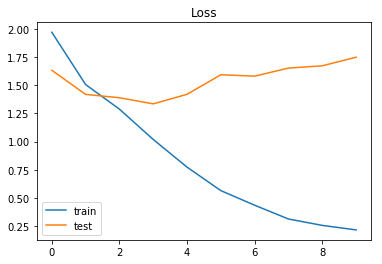

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

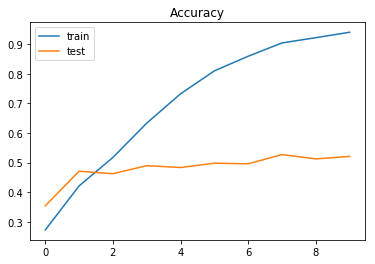

In [25]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [65]:

new_complaint = ['Não dá pra entender o meu coração Mudou de amizade pra louca paixão Então foi dessa forma que eu percebi Não quero te assustar ou me iludir']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)
labels = ['sertanejo','forro','mpb','samba','gospelreligioso','bossa-nova','axe']       
print(labels[np.argmax(pred)])

axe


Confusion Matrix
1200
[3 4 0 ... 5 6 1]
['bossa-nova', 'forro', 'axe', 'bossa-nova', 'mpb', 'samba', 'bossa-nova', 'bossa-nova', 'axe', 'bossa-nova', 'axe', 'gospelreligioso', 'sertanejo', 'sertanejo', 'gospelreligioso', 'samba', 'samba', 'gospelreligioso', 'sertanejo', 'axe', 'axe', 'mpb', 'samba', 'samba', 'bossa-nova', 'sertanejo', 'gospelreligioso', 'mpb', 'mpb', 'mpb', 'axe', 'gospelreligioso', 'forro', 'samba', 'axe', 'gospelreligioso', 'samba', 'bossa-nova', 'forro', 'bossa-nova', 'forro', 'samba', 'mpb', 'axe', 'sertanejo', 'sertanejo', 'sertanejo', 'samba', 'samba', 'samba', 'mpb', 'mpb', 'axe', 'forro', 'axe', 'axe', 'bossa-nova', 'axe', 'forro', 'samba', 'mpb', 'axe', 'bossa-nova', 'samba', 'sertanejo', 'mpb', 'bossa-nova', 'gospelreligioso', 'mpb', 'samba', 'samba', 'mpb', 'gospelreligioso', 'gospelreligioso', 'bossa-nova', 'mpb', 'mpb', 'samba', 'mpb', 'mpb', 'samba', 'mpb', 'samba', 'axe', 'bossa-nova', 'axe', 'bossa-nova', 'gospelreligioso', 'samba', 'gospelreligioso', '

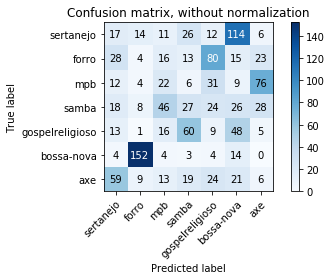

In [66]:

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
#Y_pred = model.predict(X_test,Y_test)
#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

yhat = model.predict_classes(X_test)
Y_true = []
for x in Y_test:
   Y_true.append(labels[np.argmax(x)])
Y_pred = []
for y in yhat:
  Y_pred.append(num_to_cat(y))
  
#yhat = yhat.apply(lambda l: num_to_cat(l))
print(len(Y_test))
print(yhat)
print(Y_pred)
print(Y_true)
print(labels)

plot_confusion_matrix(Y_true, Y_pred, classes=labels,
                      title='Confusion matrix, without normalization')


In [67]:
print(classification_report(Y_true, Y_pred,labels=labels))

                 precision    recall  f1-score   support

      sertanejo       0.04      0.04      0.04       151
          forro       0.17      0.14      0.15       160
            mpb       0.05      0.06      0.05       152
          samba       0.06      0.08      0.07       181
gospelreligioso       0.18      0.15      0.16       177
     bossa-nova       0.02      0.02      0.02       179
            axe       0.11      0.09      0.10       200

       accuracy                           0.08      1200
      macro avg       0.09      0.08      0.08      1200
   weighted avg       0.09      0.08      0.09      1200



In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#CNN


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax